In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 0. Загрузка, предобработка и визуализация обучающих и тестовых данных

In [57]:
df = pd.read_excel('data.xls')
df

,Дата\Час,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,2024-01-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,71.569,83.507,78.556,84.909,90.564,88.909,82.097,92.617,82.141,73.942
1,2024-01-02,66.159,60.323,59.934,58.991,65.926,68.814,71.955,83.094,91.835,...,81.973,81.159,81.542,85.174,86.396,88.637,99.631,85.428,79.096,75.569
2,2024-01-03,71.343,63.534,62.930,60.751,66.287,75.827,78.634,83.226,94.694,...,93.846,92.801,97.032,99.990,95.810,93.359,95.478,106.440,88.563,74.330
3,2024-01-04,75.556,63.900,64.464,62.335,70.257,78.144,83.858,82.886,89.696,...,83.695,81.513,84.233,89.340,95.338,91.403,102.215,104.527,94.472,79.269
4,2024-01-05,71.686,68.831,65.909,62.263,69.186,75.471,82.833,84.923,93.299,...,78.899,85.246,79.152,93.942,97.796,93.284,99.573,100.742,84.996,78.969
5,2024-01-06,73.126,65.977,60.801,58.350,67.161,73.432,82.197,84.655,92.029,...,82.673,93.242,99.498,85.793,85.644,87.579,90.410,98.107,83.345,76.698
6,2024-01-07,70.194,64.076,60.801,57.808,66.078,72.292,81.361,82.558,86.909,...,79.911,83.685,86.571,87.098,89.678,90.833,87.884,94.471,79.111,71.057
7,2024-01-08,63.734,59.919,59.467,57.143,65.526,72.938,76.957,81.825,89.929,...,81.346,82.652,79.955,83.505,89.544,87.480,99.437,83.900,81.100,73.498
8,2024-01-09,66.453,60.866,60.658,61.550,65.994,73.093,81.675,89.286,103.758,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [58]:
df = df.drop(columns='Дата\Час')
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,71.569,83.507,78.556,84.909,90.564,88.909,82.097,92.617,82.141,73.942
1,66.159,60.323,59.934,58.991,65.926,68.814,71.955,83.094,91.835,84.601,...,81.973,81.159,81.542,85.174,86.396,88.637,99.631,85.428,79.096,75.569
2,71.343,63.534,62.930,60.751,66.287,75.827,78.634,83.226,94.694,91.789,...,93.846,92.801,97.032,99.990,95.810,93.359,95.478,106.440,88.563,74.330
3,75.556,63.900,64.464,62.335,70.257,78.144,83.858,82.886,89.696,90.817,...,83.695,81.513,84.233,89.340,95.338,91.403,102.215,104.527,94.472,79.269
4,71.686,68.831,65.909,62.263,69.186,75.471,82.833,84.923,93.299,95.227,...,78.899,85.246,79.152,93.942,97.796,93.284,99.573,100.742,84.996,78.969
5,73.126,65.977,60.801,58.350,67.161,73.432,82.197,84.655,92.029,92.149,...,82.673,93.242,99.498,85.793,85.644,87.579,90.410,98.107,83.345,76.698
6,70.194,64.076,60.801,57.808,66.078,72.292,81.361,82.558,86.909,83.413,...,79.911,83.685,86.571,87.098,89.678,90.833,87.884,94.471,79.111,71.057
7,63.734,59.919,59.467,57.143,65.526,72.938,76.957,81.825,89.929,90.488,...,81.346,82.652,79.955,83.505,89.544,87.480,99.437,83.900,81.100,73.498
8,66.453,60.866,60.658,61.550,65.994,73.093,81.675,89.286,103.758,136.804,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [65]:
data = np.array(df).flatten()
data, data.shape

(array([  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,  83.915,  74.879,
         71.569,  83.507,  78.556,  84.909,  90.564,  88.909,  82.097,
         92.617,  82.141,  73.942,  66.159,  60.323,  59.934,  58.991,
         65.926,  68.814,  71.955,  83.094,  91.835,  84.601,  81.881,
         79.911,  88.205,  81.72 ,  81.973,  81.159,  81.542,  85.174,
         86.396,  88.637,  99.631,  85.428,  79.096,  75.569,  71.343,
         63.534,  62.93 ,  60.751,  66.287,  75.827,  78.634,  83.226,
         94.694,  91.789,  90.805,  87.272,  84.488,  82.505,  93.846,
         92.801,  97.032,  99.99 ,  95.81 ,  93.359,  95.478, 106.44 ,
         88.563,  74.33 ,  75.556,  63.9  ,  64.464,  62.335,  70.257,
         78.144,  83.858,  82.886,  89.696,  90.817,  86.275,  87.51 ,
         91.513,  84.024,  83.695,  81.513,  84.233,  89.34 ,  95.338,
         91.403, 102.215, 104.527,  94.472,  79.269,  71.686,  68.831,
      

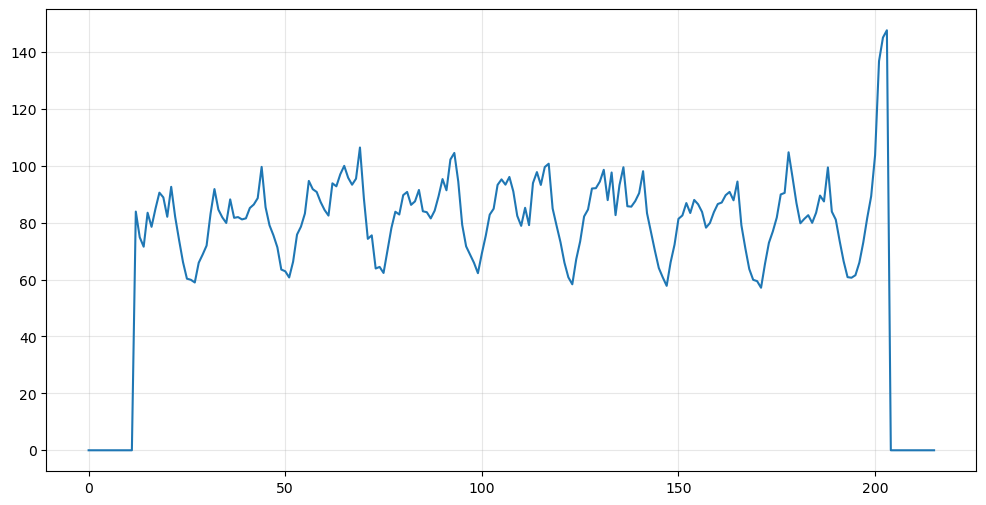

In [69]:
plt.figure(figsize=(12,6))
plt.plot(data)
plt.grid('on', alpha=.3);

# 1. Разбиение выборки на обучающие и тестовые подвыборки

In [201]:
train_size = 150
bias = 10

train_data = data[:train_size]
val_data = data[train_size + bias:]

train_data.shape, val_data.shape

((150,), (56,))

In [202]:
hist = 6           # длина истории
future = 1          # горизонт предсказания

# параметры обучения модели
batch_size = 32
epochs = 10

In [203]:
start = hist + future
end = start + train_size

print(start, end)

X_train = train_data
y_train = data[start:end]

x_end = len(val_data) - hist - future
label_start = len(train_data) + bias + hist + future
print(x_end, label_start)

X_val = val_data[:x_end]
y_val = data[label_start:]

7 157
49 167


In [204]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((150,), (150,), (49,), (49,))

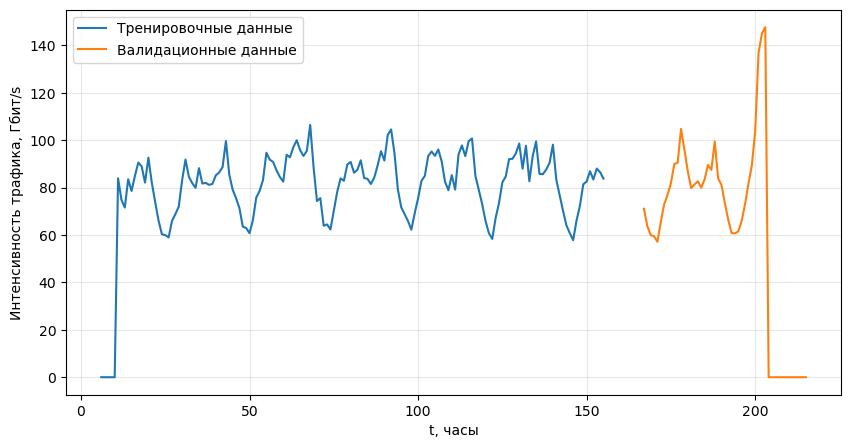

In [205]:
plt.figure(figsize=(10,5))
plt.plot(range(hist, y_train.shape[0] + hist), y_train, label='Тренировочные данные')
plt.plot(range(y_train.shape[0] + hist + bias + future,
               y_train.shape[0] + hist + bias + future + y_val.shape[0]),
               y_val,
               label='Валидационные данные')
plt.grid('on', alpha=.3)
plt.xlabel('t, часы')
plt.ylabel('Интенсивность трафика, Гбит/s')
plt.legend(loc='best');


# 2. Формирование `timeseries_dataset`

In [206]:
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

dataset_train = timeseries_dataset_from_array(
    X_train, y_train,
    sequence_length=hist,
    sampling_rate=1,
    batch_size=batch_size
)

dataset_val = timeseries_dataset_from_array(
    X_val, y_val,
    sequence_length=hist,
    sampling_rate=1,
    batch_size=batch_size
)

In [207]:
for batch in dataset_train:
    inputs, targets = batch
    print('Input shape: ', inputs.shape)
    print(inputs[1])
    print("Target shape:", targets.shape)
    print(targets[1])
    break

Input shape:  (32, 6)
tf.Tensor([0. 0. 0. 0. 0. 0.], shape=(6,), dtype=float64)
Target shape: (32,)
tf.Tensor(0.0, shape=(), dtype=float64)


# 3. Конструирование и обучение ИНС

In [208]:
from keras.layers import LSTM, Conv1D, Dense, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_mae', patience=5)

model = Sequential()
model.add(LSTM(32, input_shape = (inputs.shape[1], 1), return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(Conv1D(64, kernel_size=1, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mae', optimizer='Adam', metrics=['mae'])
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_55 (LSTM)              (None, 6, 32)             4352      
                                                                 
 lstm_56 (LSTM)              (None, 6, 32)             8320      
                                                                 
 conv1d_36 (Conv1D)          (None, 4, 64)             6208      
                                                                 
 conv1d_37 (Conv1D)          (None, 4, 64)             4160      
                                                                 
 flatten_12 (Flatten)        (None, 256)               0         
                                                                 
 dense_24 (Dense)            (None, 10)                2570      
                                                                 
 dense_25 (Dense)            (None, 1)               

In [209]:
history = model.fit(
    dataset_train,
    epochs=20,
    validation_data=dataset_val,
    callbacks=[early_stop]
)

Epoch 1/20
5/5 [==============================] - 7s 286ms/step - loss: 78.9350 - mae: 78.9350 - val_loss: 69.8810 - val_mae: 69.8810
Epoch 2/20
5/5 [==============================] - 0s 36ms/step - loss: 78.8668 - mae: 78.8668 - val_loss: 69.8124 - val_mae: 69.8124
Epoch 3/20
5/5 [==============================] - 0s 44ms/step - loss: 78.7581 - mae: 78.7581 - val_loss: 69.7109 - val_mae: 69.7109
Epoch 4/20
5/5 [==============================] - 0s 32ms/step - loss: 78.6186 - mae: 78.6186 - val_loss: 69.6188 - val_mae: 69.6188
Epoch 5/20
5/5 [==============================] - 0s 34ms/step - loss: 78.5201 - mae: 78.5201 - val_loss: 69.5883 - val_mae: 69.5883
Epoch 6/20
5/5 [==============================] - 0s 37ms/step - loss: 78.4933 - mae: 78.4933 - val_loss: 69.5854 - val_mae: 69.5854
Epoch 7/20
5/5 [==============================] - 0s 35ms/step - loss: 78.4898 - mae: 78.4898 - val_loss: 69.5853 - val_mae: 69.5853
Epoch 8/20
5/5 [==============================] - 0s 69ms/step - los

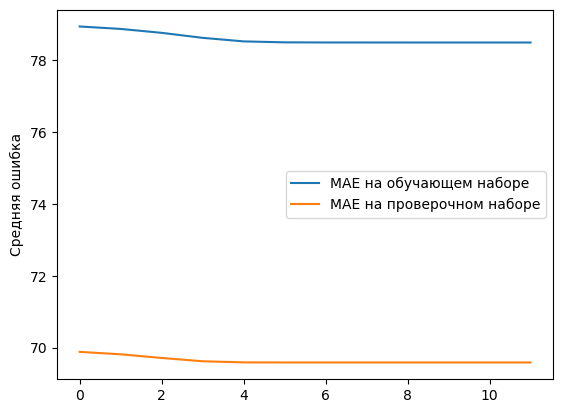

In [210]:
plt.plot(history.history['mae'][:],
         label='MAE на обучающем наборе')
plt.plot(history.history['val_mae'][:],
         label='MAE на проверочном наборе')

plt.ylabel('Средняя ошибка')
plt.legend();

# 4. Проверка работы ИНС

In [212]:
pred = model.predict(dataset_train)
pred_val = model.predict(dataset_val)

2/2 [==============================] - 0s 32ms/step


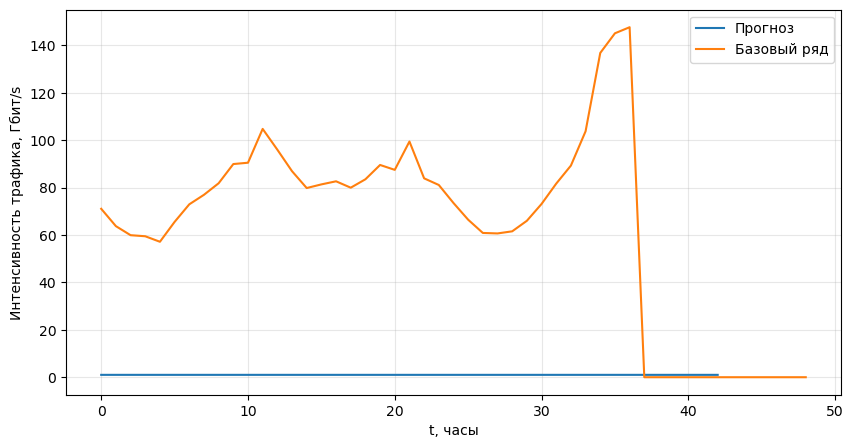

In [213]:
# валидация

start = 0
step = 50
plt.figure(figsize=(10, 5))
plt.grid('on', alpha=.3)
plt.plot(pred_val[future + start: future + start + step], label='Прогноз')
plt.plot(y_val[start: start + step], label='Базовый ряд')
plt.xlabel('t, часы')
plt.ylabel('Интенсивность трафика, Гбит/s')
plt.legend();


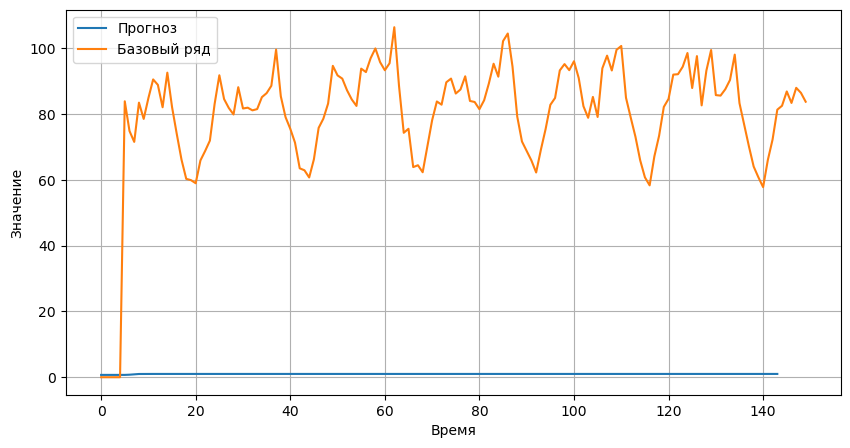

In [214]:
# на трейне

start = 0

plt.figure(figsize=(10, 5))
plt.grid('on')
plt.plot(pred[future + start: future + train_size],
         label='Прогноз')
plt.plot(y_train[start: train_size],
         label='Базовый ряд')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()